<a href="https://colab.research.google.com/github/kevintsi/deep_learning_course/blob/main/Deep_learning_course_production.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Production

In [2]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 8.4 MB/s 
     |████████████████████████████████| 1.2 MB 56.2 MB/s 
     |████████████████████████████████| 46 kB 4.6 MB/s 
     |████████████████████████████████| 189 kB 69.4 MB/s 
     |████████████████████████████████| 56 kB 5.1 MB/s 
     |████████████████████████████████| 51 kB 310 kB/s 
Mounted at /content/gdrive


In [10]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [11]:
key = os.environ.get('AZURE_SEARCH_KEY', 'd69e5d38a5a640e0b867277ae3c5edc9')

In [31]:
search_images_bing

<function fastbook.search_images_bing>

Recherche 'grizzly bear' sur Bing et récupères les résultats en ne prenant que l'attribut 'contentUrl'

In [35]:
results = search_images_bing(key, 'grizzly bear') 
print(results)
ims = results.attrgot('contentUrl')
ims

[{'webSearchUrl': 'https://www.bing.com/images/search?view=detailv2&FORM=OIIRPO&q=grizzly+bear&id=4FE226180F7071D1B3F36B29C2EA074B00E3CBEC&simid=607989609222770522', 'name': 'Grizzly Bear Basic Facts And New Pictures | The Wildlife', 'thumbnailUrl': 'https://tse1.mm.bing.net/th?id=OIP.Mw_Mi-jVWv9_0SNTuiGaSQHaE8&pid=Api', 'datePublished': '2012-10-15T12:00:00.0000000Z', 'isFamilyFriendly': True, 'contentUrl': 'http://2.bp.blogspot.com/-NjMTuklENdE/UHzVv_8dIxI/AAAAAAAAA-U/tNBsQDn8kFI/s1600/Grizzly+Bear+Pic.jpg', 'hostPageUrl': 'http://wildlifeanimalz.blogspot.com/2012/10/Grizzly-Bear.html', 'contentSize': '332689 B', 'encodingFormat': 'jpeg', 'hostPageDisplayUrl': 'wildlifeanimalz.blogspot.com/2012/10/Grizzly-Bear.html', 'width': 1600, 'height': 1068, 'hostPageFavIconUrl': 'https://www.bing.com/th?id=ODF.kCKFU1-d0l3Elu2Vvbpmew&pid=Api', 'hostPageDomainFriendlyName': 'blogspot.com', 'hostPageDiscoveredDate': '2012-10-15T12:00:00.0000000Z', 'thumbnail': {'width': 474, 'height': 316}, 'imag

(#150) ['http://2.bp.blogspot.com/-NjMTuklENdE/UHzVv_8dIxI/AAAAAAAAA-U/tNBsQDn8kFI/s1600/Grizzly+Bear+Pic.jpg','https://bozone.com/site/wp-content/uploads/2019/03/GRIZZLY.jpeg','https://tetonvalleylodge.com/wp-content/uploads/2015/04/grizzly-bear-idaho.jpg','https://d3d0lqu00lnqvz.cloudfront.net/media/media/897b2e5d-6d4c-40fa-bbe8-6829455747e2.jpg','https://i2.wp.com/nypost.com/wp-content/uploads/sites/2/2020/09/grizzly-bear-89.jpg?quality=90&strip=all&ssl=1','https://wallsdesk.com/wp-content/uploads/2017/01/Grizzly-Bear-Background-.jpg','https://media.spokesman.com/photos/2017/11/30/Yellowstone_Grizzlies.JPG.jpg','https://www.alloutdoor.com/wp-content/uploads/2019/08/Grizzly_Bear_Ursus_arctos_ssp..jpg','https://www.tsln.com/wp-content/uploads/2018/10/bears-tsln-101318-3-1240x826.jpg','https://www.conservationnw.org/wp-content/uploads/2017/10/grizzly-bears-1280x950.jpg'...]

Télécharge une image et l'ajoute au dossier images avec comme nom de fichier (grizzly.jpg)

In [14]:
#hide
ims = ['http://3.bp.blogspot.com/-S1scRCkI3vY/UHzV2kucsPI/AAAAAAAAA-k/YQ5UzHEm9Ss/s1600/Grizzly%2BBear%2BWildlife.jpg']

In [36]:
dest = 'images/grizzly.jpg'
download_url(ims[0], dest)

Path('images/grizzly.jpg')

Affiche l'image qui a été téléchargé sous forme de miniature

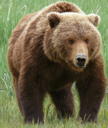

In [18]:
im = Image.open(dest)
im.to_thumb(128,128)

In [37]:
bear_types = 'grizzly','black','teddy'
path = Path('bears')

Si le dossier 'bears' n'existe pas il est crée puis pour chaque type d'ours (liste bear_types)
un dossier est crée à son nom puis une liste d'image est téléchargé avec les résultats obtenu suite
à la recherche

In [39]:
if not path.exists():
    path.mkdir()
    for o in bear_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} bear')
        download_images(dest, urls=results.attrgot('contentUrl'))

Récupère la liste des images téléchargées dans le path donnée

In [40]:
fns = get_image_files(path)
fns

(#437) [Path('bears/black/00000054.jpg'),Path('bears/black/00000092.jpg'),Path('bears/black/00000028.jpg'),Path('bears/black/00000018.jpg'),Path('bears/black/00000034.jpg'),Path('bears/black/00000038.jpg'),Path('bears/black/00000011.jpg'),Path('bears/black/00000093.jpg'),Path('bears/black/00000073.jpg'),Path('bears/black/00000096.jpg')...]

Donne la liste des images qui ne peuvent pas être ouverte

In [42]:
failed = verify_images(fns)
failed

(#0) []

In [43]:
failed.map(Path.unlink);

DataBlock

In [8]:
doc(DataBlock)

In [24]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

blocks=(IndependentVariable, DependentVariable)

  IndependentVariable : Categories
  DependentVariable : Target

In [25]:
dls = bears.dataloaders(path)

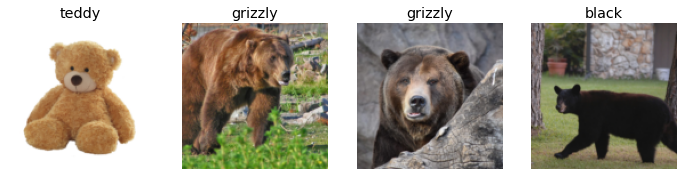

In [26]:
dls.valid.show_batch(max_n=4, nrows=1)

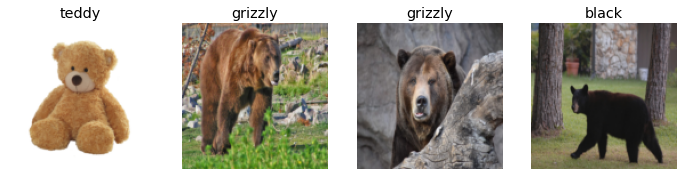

In [27]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

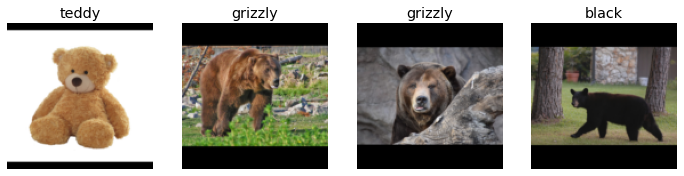

In [28]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

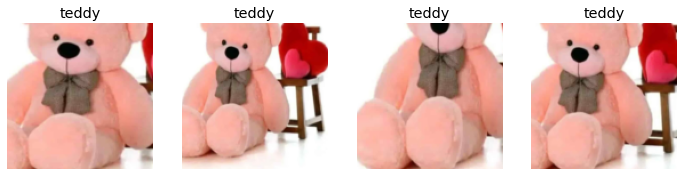

In [29]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


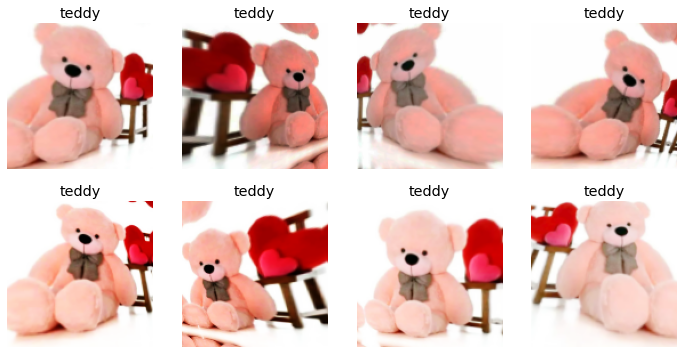

In [30]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)